# Building Neuron Tensors
Resources that have been useful:
* [key resource] Stanford tutorial: https://cs231n.github.io/convolutional-networks/
* [key resource] Stackexchange that makes all this clear with a simple example: https://stackoverflow.com/questions/52272592/how-many-neurons-does-the-cnn-input-layer-have
----
* https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
* https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/
* https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks
* https://hackernoon.com/learning-keras-by-implementing-vgg16-from-scratch-d036733f2d5

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import InputLayer, Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.python.keras import backend as K
import math

* load a pre-trained network (VGG16)
* input images from CIFAR-10 to VGG16
* choose some random unit in one of the layers and plot its activity for different images

## Load VGG16 model

In [2]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False, weights='imagenet',input_shape=(32,32,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [3]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

## Load CIFAR-10 Data

In [192]:
from tensorflow.python.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #load dataset into ~/.keras/datasets/

#printout shapes of train and test data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [193]:
N_train = 50000
N_test = 10000
img_shape = (32, 32, 3) #use a tuple in the fomat: (height, width, n_channels)
n_classes = 9
print(N_train,N_test,img_shape,n_classes)

50000 10000 (32, 32, 3) 9


In [196]:
## normalize the images 
x_train.dtype ##int from 0 to 255
x_train = x_train / 255.0
x_train.dtype

dtype('float64')

In [8]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
idx = (y_train == 3).reshape(x_train.shape[0])
images_cat = x_train[idx]
images_cat[0]

array([[[0.49019608, 0.49019608, 0.45490196],
        [0.43137255, 0.39607843, 0.35686275],
        [0.4       , 0.35294118, 0.3254902 ],
        ...,
        [0.79215686, 0.81176471, 0.83921569],
        [0.78431373, 0.80392157, 0.83137255],
        [0.79215686, 0.81568627, 0.83921569]],

       [[0.55686275, 0.57254902, 0.55686275],
        [0.57254902, 0.56470588, 0.54509804],
        [0.69019608, 0.6745098 , 0.66666667],
        ...,
        [0.76470588, 0.78823529, 0.80392157],
        [0.77647059, 0.80392157, 0.81960784],
        [0.8       , 0.82745098, 0.84313725]],

       [[0.70588235, 0.7254902 , 0.71764706],
        [0.56078431, 0.57254902, 0.57254902],
        [0.61176471, 0.61568627, 0.61568627],
        ...,
        [0.47843137, 0.43529412, 0.44313725],
        [0.54509804, 0.50196078, 0.51372549],
        [0.61960784, 0.57647059, 0.58823529]],

       ...,

       [[0.40784314, 0.32156863, 0.16078431],
        [0.39607843, 0.31372549, 0.15294118],
        [0.39607843, 0

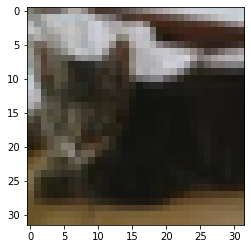

In [10]:
plt.imshow(images_cat[0])

(32, 32)


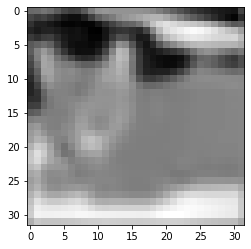

In [11]:
im = images_cat[0]
im.shape
layer = model.layers[1] 
output_layer = K.function(inputs=[layer.input], 
                      outputs=[layer.output])
out = output_layer(np.array([im]))[0] 
out_feature_map_5 = out[0,:,:,5]
plt.imshow(out_feature_map_5, cmap='gray')
print(out_feature_map_5.shape)

In [12]:
images_cat = images_cat[0:3]

In [13]:
idx = (y_train == 1).reshape(x_train.shape[0])
images_automobile = x_train[idx]

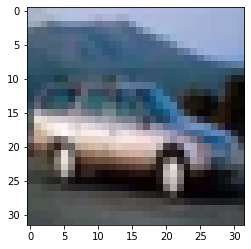

In [14]:
plt.imshow(images_automobile[0])

In [15]:
images_automobile = images_automobile[0:3]

In [16]:
images = np.vstack((images_cat, images_automobile))

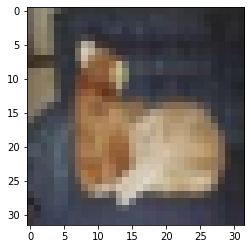

In [17]:
plt.imshow(images[1])

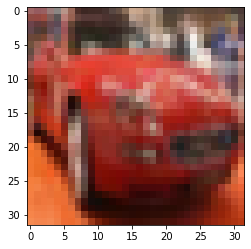

In [18]:
plt.imshow(images[4])

In [19]:
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # note that layer.get_weights()[0] contains the weights and layer.get_weights()[0] the biases
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    break

block1_conv1 (3, 3, 3, 64)


In [20]:
filters[:,:,:,31]

array([[[ 0.12836744,  0.12447353,  0.14893703],
        [ 0.08564197,  0.09525505,  0.13036445],
        [ 0.12136985,  0.11141251,  0.13415098]],

       [[ 0.11066163,  0.11669213,  0.14171803],
        [-0.0145823 ,  0.00535035,  0.04218798],
        [ 0.11101208,  0.11018976,  0.13311349]],

       [[ 0.15973611,  0.14212981,  0.15279444],
        [ 0.09495541,  0.09029514,  0.11152215],
        [ 0.15397617,  0.12912421,  0.13753545]]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


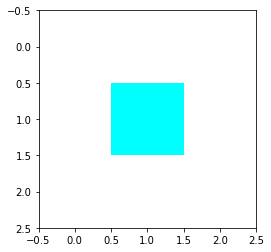

In [21]:
plt.imshow(filters[:,:,:,31]*255)

### Define function for general layer/neuron/image index: 

outputSize_W = (W−F+2P)/S+1

outputSize_H = (H−F+2P)/S+1

W = width = 32, H = height = 32, F = filter size = 3, P = padding = 1, S = stride = 1

In [22]:
layer = model.layers[1] 
output_layer = K.function(inputs=[model.layers[1].input], 
                          outputs=[layer.output])
images = x_train[range(20)]
print(images.shape)
## output is n feature maps
out = output_layer(np.array(images))[0]
print(out[0,:,:,0])
print(out.shape)
out = out.reshape((20,1024,64))
print(out[0,:,0])

(20, 32, 32, 3)
[[0.4858523  0.70383734 0.49769667 ... 0.         0.         0.8963195 ]
 [0.88606524 1.1181241  0.6948559  ... 1.2431458  1.2266304  2.0830274 ]
 [0.6184006  0.44327378 0.03400409 ... 0.8448083  0.9000494  1.6960227 ]
 ...
 [0.         1.125205   0.75498694 ... 1.6025474  1.3317566  0.8969606 ]
 [0.         0.9214928  0.6406365  ... 0.6815177  0.8344991  0.9304966 ]
 [0.75257576 1.8965347  1.7328649  ... 1.9178761  2.054815   1.8354475 ]]
(20, 32, 32, 64)
[0.4858523  0.70383734 0.49769667 ... 1.9178761  2.054815   1.8354475 ]


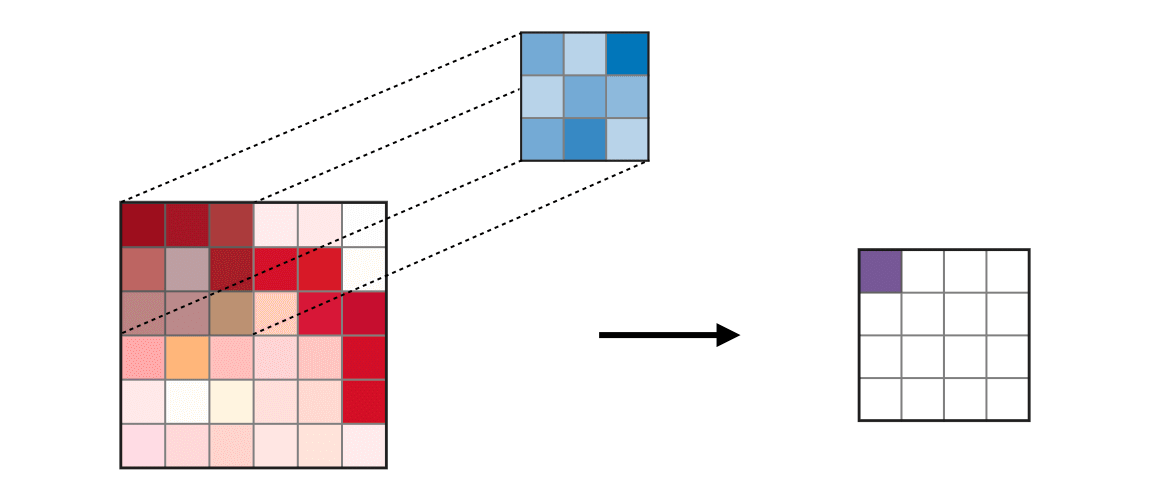

In [23]:
out_t = np.transpose(out, (0, 2, 1))
out_t.shape

(20, 64, 1024)

In [24]:
## check that it's doing the right thing
print(out[0,0,1])
print(out_t[0,1,0])

0.11915783
0.11915783


### Applying shifts:
* shift_step = 3, which is the filter size
* shift the images such that each filter eventually capture all pixels

In [25]:
plt.imshow(im1)

NameError: name 'im1' is not defined

In [28]:
np.roll?

In [72]:
def apply_all_vertical_shifts(im):
    '''
    arg(s): 
        im, an image of shape (im_size, im_size, 3)
    return: 
        im_all_shifts, a list of all shifted images from the input image
        n_shifts, number of shifted images
    '''
    # +2 is because of the 1-pixel padding around the image
    im_size = im.shape[0]
    ## each shift distance is 3 (size of the filter)
    shift_step = 3
    n_shifts = int(math.ceil(im_size/ shift_step))
    im_all_shifts = []
    # 3 is #channels
    im_vec = im.reshape(im_size*im_size,3)

    for i in range(n_shifts):
        im_shift = np.roll(im_vec,i*shift_step*im_size*3)
        im_shift = im_shift.reshape((im_size,im_size,3))
        im_all_shifts.append(im_shift[:,:,:])
    im_all_shifts =  np.array(im_all_shifts)
    
    return im_all_shifts, n_shifts

(11, 32, 32, 3)


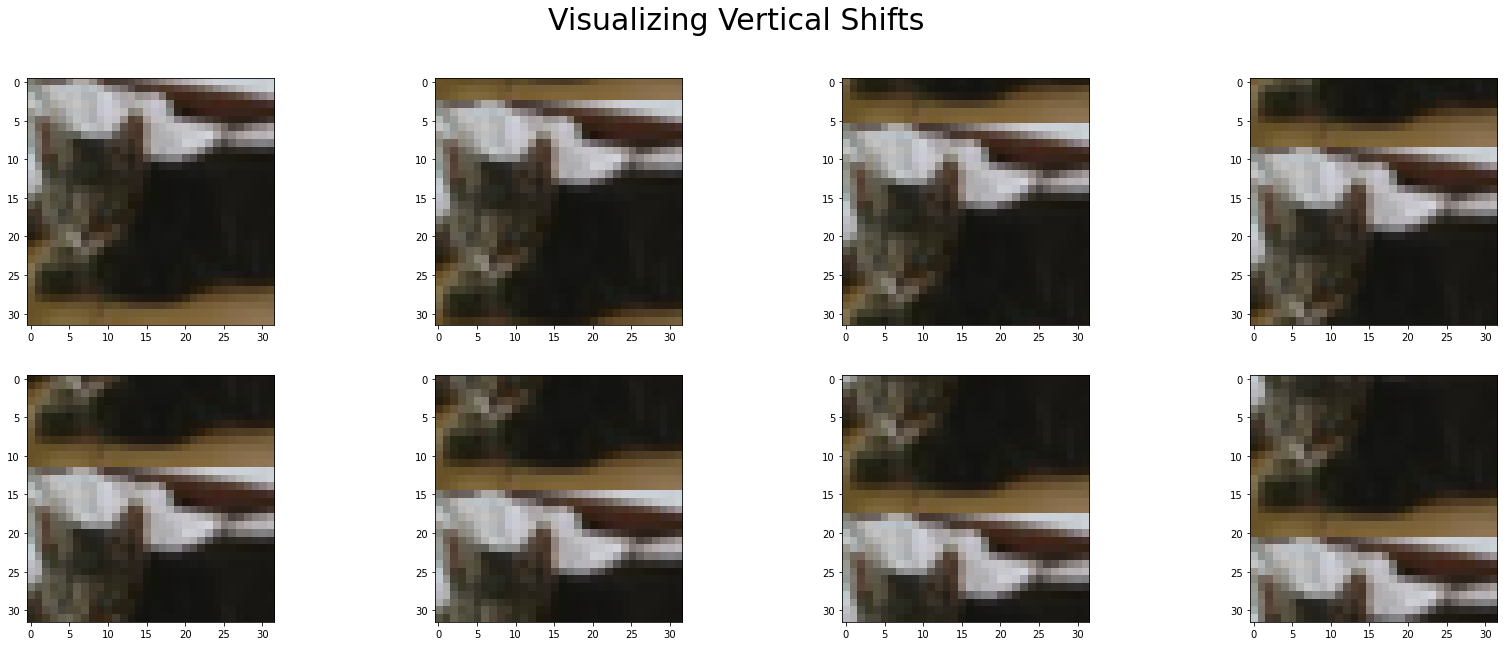

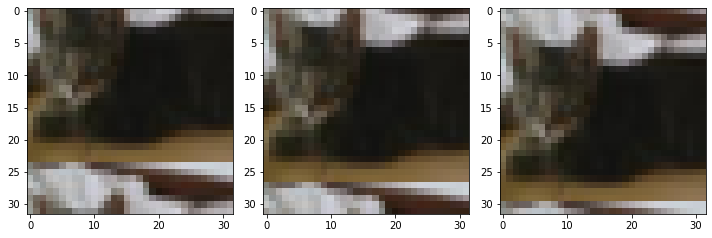

In [30]:
## check the shifted images
im1 = images_cat[0]
im_all_shifts, n_shifts = apply_all_vertical_shifts(im1)
nrow = int(n_shifts/5)

fig, axs = plt.subplots(nrow, 4, figsize =  (28,10))
for i , ax in enumerate(axs.flatten()):
    ax.imshow(im_all_shifts[i])
fig.suptitle('Visualizing Vertical Shifts', fontsize=30)

if n_shifts - nrow * 4 != 0:
    I = i + 1
    if n_shifts - nrow * 4 == 1:
        plt.imshow(im_all_shifts[I])
        plt.show()
    else:
        fig, axs = plt.subplots(1, n_shifts - nrow * 4, figsize = (10,24))
        for _,ax in enumerate(axs):
            ax.imshow(im_all_shifts[I])
            I = I + 1  
        plt.tight_layout()

### Applying horizontal shifts:
**note applying horizontal shifts is just transpose the image first, applying vertical shifts and then transpose back**

(11, 32, 32, 3)


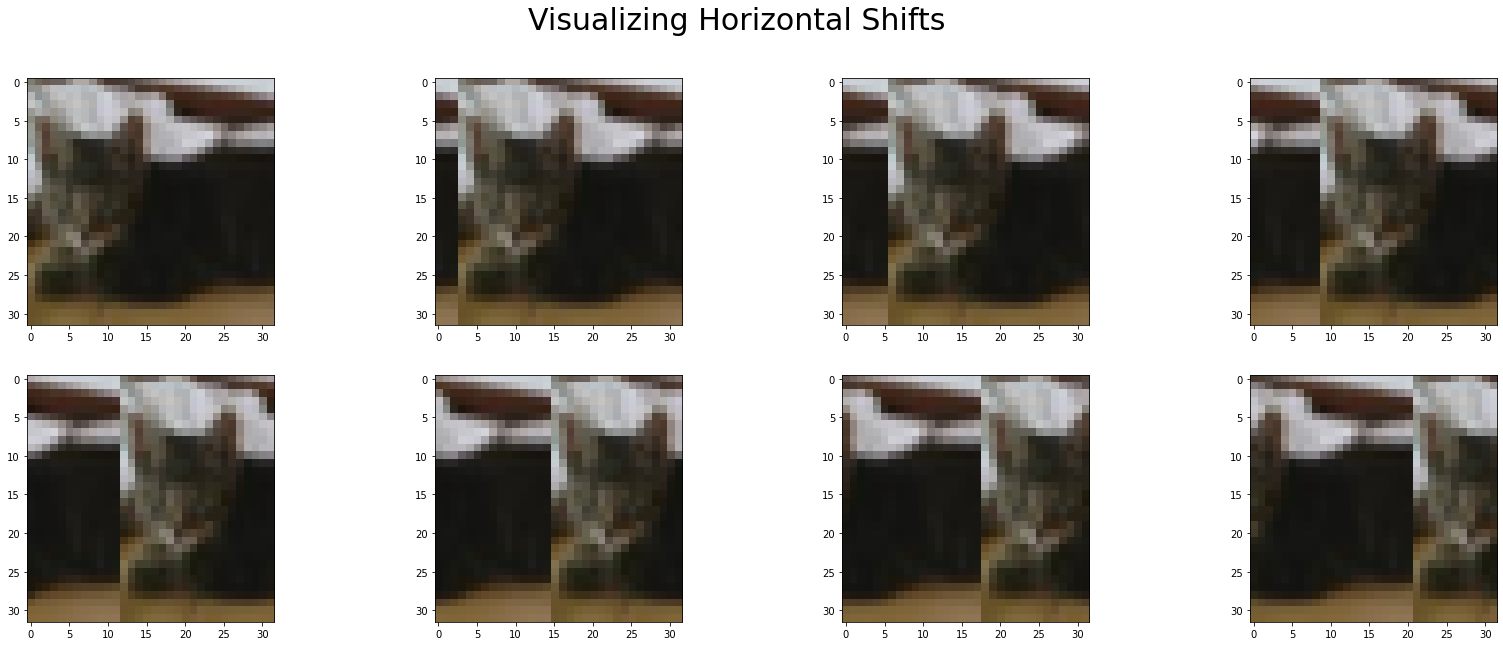

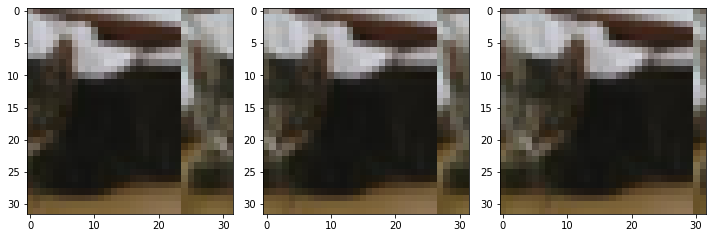

In [31]:
im1_T = np.transpose(im1, (1, 0, 2))
im_all_shifts_T, n_shifts = apply_all_vertical_shifts(im1_T)
nrow = int(n_shifts/5)

fig, axs = plt.subplots(nrow, 4, figsize =  (28,10))
for i , ax in enumerate(axs.flatten()):
    im_all_shifts_T[i] = np.transpose(im_all_shifts_T[i], (1, 0, 2))
    ax.imshow(im_all_shifts_T[i])
fig.suptitle('Visualizing Horizontal Shifts', fontsize=30)

if n_shifts - nrow * 4 != 0:
    I = i + 1
    if n_shifts - nrow * 4 == 1:
        im_all_shifts_T[I] = np.transpose(im_all_shifts_T[I], (1, 0, 2))
        plt.imshow(im_all_shifts_T[I])
        plt.show()
    else:
        fig, axs = plt.subplots(1, n_shifts - nrow * 4, figsize = (10,24))
        for _,ax in enumerate(axs):
            im_all_shifts_T[I] = np.transpose(im_all_shifts_T[I], (1, 0, 2))
            ax.imshow(im_all_shifts_T[I])
            I = I + 1  
        plt.tight_layout()

## Function to compute neuron output (neuron dimension):
The following code does the following:
For each layer in the neural network, choose one feature map with the highest firing rate. 

In [102]:
def compute_neuron_output(layer_indices, images, plot_activity = False):

    '''
    arg(s):
        layer_indices: list of the indices of the layers we want to take neuron outputs from
        images: an array of images (stimuli)
    return:
        
    '''
    n_layers = len(layer_indices)
    neuron_output_highest = []
    all_fm_avg = []
    neuron_labels = []
    
    for layer_index in layer_indices:
        layer = model.layers[layer_index] 
        
        # check for convolutional layer
        if 'conv' not in layer.name:
            continue
        
        ## note: always take the images as inputs
        output_layer = K.function(inputs=[model.layers[1].input], 
                              outputs=[layer.output])
        
        ## output is n feature maps
        neuron_output = output_layer(np.array(images))[0]
        
        ## number of neurons is nrow * ncol * n_feature_maps
        n_images, n_row, n_col, n_feature_maps = neuron_output.shape[:]
        neuron_output = neuron_output.reshape((n_images, n_row * n_col, n_feature_maps))
        
        neuron_labels += [layer_index] * n_row * n_col
        
        ## transpose to organize by feature maps
        ## neuron_output_by_fm is (n_images, n_feature_maps, #neurons)
        neuron_output_by_fm = np.transpose(neuron_output, (0, 2, 1)) 
        
        ## compute avg neuron firing rate in each feature map
        ## fm_avg is (n_images, n_feature_maps)
        fm_avg = neuron_output_by_fm.sum(axis=2) / neuron_output_by_fm.shape[2]
        
        if layer_index == 1:
            fm_avg_all_layers = fm_avg
        else:
            fm_avg_all_layers = np.hstack((fm_avg_all_layers, fm_avg))
        
        max_fm_ind = np.argmax(fm_avg,axis = 1)
        
        if plot_activity == True:
            print("Current layer: " + layer.name)
            print("Indices of FM with highest average firing rate in response to each image: " )
            print(max_fm_ind)
            print("#neurons in the FM with highest average firing rate: " + str(n_row * n_col))
            print("Average activity for all feature maps in " + layer.name)
            plt.matshow(fm_avg)
            plt.show()
            print('----------------------------------------------------\n')
        
        temp = neuron_output_by_fm[0,max_fm_ind[0],:].reshape(1, n_row * n_col)
        for i in range(1,n_images):
            temp = np.vstack((temp, neuron_output_by_fm[i,max_fm_ind[i],:].reshape(1, n_row * n_col)))
        if(layer_index == 1): 
            neuron_output_highest = temp
        else:
            neuron_output_highest = np.hstack((neuron_output_highest, temp))
    
    neuron_labels = np.array(neuron_labels)     
    return neuron_output_highest, fm_avg_all_layers, neuron_labels 

## Function to get images (stimuli dimension):

In [188]:
def show_stimuli(layer_indices, n_images_per_class, image_classes, shifts, plot_activity = False):
    '''
    arg(s): 
        layer_indices
        n_images_per_class
        image_classes
        shifts = True/False
    return:
        neuron_output_shifts_avg, (n_images, n_neurons)
    '''
    # select images from specified classes:
    
    n_classes = len(image_classes)
    n_images = n_classes * n_images_per_class
    
    for i in range(n_classes):
        idx = (y_train == image_classes[i]).reshape(x_train.shape[0])
        images = x_train[idx]
        ## images has shape (5000, 32, 32, 3), take the first n_images_per_class images from each selected class:
        images = images[0:n_images_per_class,:,:,:]
        if i == 0:
            images_selected_classes = images
        else:
            images_selected_classes = np.vstack((images_selected_classes, images))
    
    if shifts is False:
        neuron_output_highest, fm_avg_all_layers, neuron_labels = compute_neuron_output(layer_indices, images_selected_classes, plot_activity = plot_activity)
    
    else:
        # generate shifts for each selected image: 
        neuron_output_highest_with_shifts = []
        fm_avg_all_layers_with_shifts = []
        for i in range(n_images):
            im = images_selected_classes[i]
            im_all_vertical_shifts, n_vertical_shifts = apply_all_vertical_shifts(im)
            im_T = np.transpose(im, (1, 0, 2))
            im_all_horizontal_shifts, n_horizontal_shifts = apply_all_vertical_shifts(im1_T)
            im_all_shifts = np.vstack((im_all_vertical_shifts, im_all_horizontal_shifts))

            neuron_output_highest, fm_avg_all_layers, neuron_labels = compute_neuron_output(layer_indices, im_all_shifts, plot_activity = False)
            ## neuron_output_highest is of shape (number of shifts, neurons)

            ## take the average over all shifts of im
            shifts_avg = neuron_output_highest.sum(axis=0) / neuron_output_highest.shape[0]
            shifts_avg = shifts_avg.reshape((1,shifts_avg.shape[0]))
            
            fm_shifts_avg = fm_avg_all_layers.sum(axis=0) / fm_avg_all_layers.shape[0]
            fm_shifts_avg = fm_shifts_avg.reshape((1,fm_shifts_avg.shape[0]))
            
            if i == 0:
                neuron_output_highest_with_shifts = shifts_avg 
                fm_avg_all_layers_with_shifts = fm_shifts_avg
            else:
                neuron_output_highest_with_shifts = np.vstack((neuron_output_highest_with_shifts, shifts_avg))
                fm_avg_all_layers_with_shifts = np.vstack((fm_avg_all_layers_with_shifts, fm_shifts_avg))
                
        neuron_output_highest = neuron_output_highest_with_shifts
        fm_avg_all_layers = fm_avg_all_layers_with_shifts
        
    return neuron_output_highest, fm_avg_all_layers, neuron_labels

### if stimuli = images with shifts:

In [157]:
neuron_output_highest_with_shifts, fm_avg_all_layers_with_shifts, neuron_labels = show_stimuli(layer_indices = range(20), n_images_per_class = 10, image_classes = [3,1,0,5], shifts = True)

In [158]:
neuron_output_highest_with_shifts.shape

(40, 2812)

In [159]:
fm_avg_all_layers_with_shifts.shape

(40, 4224)

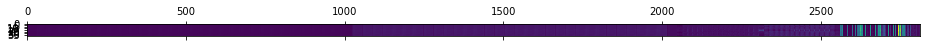

In [160]:
plt.matshow(neuron_output_highest_with_shifts )

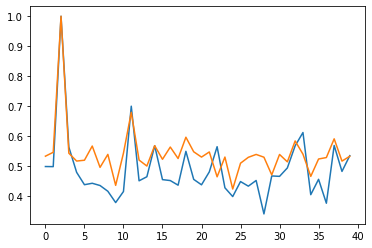

In [162]:
plt.plot(fm_avg_all_layers_with_shifts[:,5]/max(fm_avg_all_layers_with_shifts[:,5]))
plt.plot(fm_avg_all_layers_with_shifts[:,15]/max(fm_avg_all_layers_with_shifts[:,15]))
plt.show()

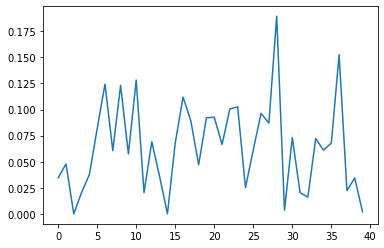

In [164]:
fm_5_with_shifts = fm_avg_all_layers_with_shifts[:,5]/max(fm_avg_all_layers_with_shifts[:,5])
fm_15_with_shifts = fm_avg_all_layers_with_shifts[:,15]/max(fm_avg_all_layers_with_shifts[:,15])
plt.plot(abs(fm_5_with_shifts - fm_15_with_shifts))
plt.show()

### with shifts, generate embedding:

In [181]:
neuron_output_highest_with_shifts.shape

(40, 2812)

In [182]:
from sklearn.decomposition import PCA
pca = PCA(3)
neuron_output_highest_with_shifts_projected = pca.fit_transform(neuron_output_highest_with_shifts.T)
neuron_output_highest_with_shifts_projected.shape
# pca.fit(neuron_output_highest)
# vectors, lambdas = pca.components_, pca.explained_variance_

(2812, 3)

In [183]:
set(neuron_labels)

{1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17}

In [186]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
traces = []
colors_palette = px.colors.qualitative.Dark24
data = neuron_output_highest_with_shifts_projected

for i, label in enumerate(set(neuron_labels)):
    mask = (neuron_labels == label)
    print(label, sum(mask))
    traces.append(go.Scatter3d(
        x=data[mask,0],
        y=data[mask,1],
        z=data[mask,2],
        mode='markers',
        marker=dict(
            size=4,
            color=colors_palette[i],
            opacity=1,

            #showscale= True,
        )))

for trace in traces:
    fig.add_trace(trace)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),showlegend=True,)
fig.show()

1 1024
2 1024
4 256
5 256
7 64
8 64
9 64
11 16
12 16
13 16
15 4
16 4
17 4


### if stimuli = images with no shifts:

Current layer: block1_conv1
Indices of FM with highest average firing rate in response to each image: 
[31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]
#neurons in the FM with highest average firing rate: 1024
Average activity for all feature maps in block1_conv1


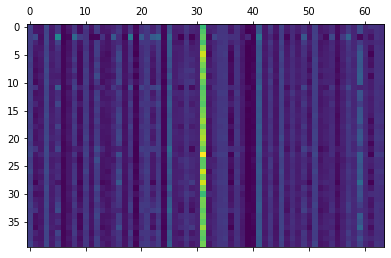

----------------------------------------------------

Current layer: block1_conv2
Indices of FM with highest average firing rate in response to each image: 
[ 4  4 52  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4]
#neurons in the FM with highest average firing rate: 1024
Average activity for all feature maps in block1_conv2


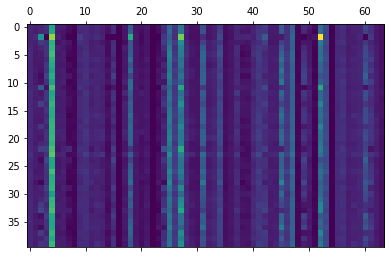

----------------------------------------------------

Current layer: block2_conv1
Indices of FM with highest average firing rate in response to each image: 
[ 20  20  56  15 125  15  15  20  15 125  20  15 125 125 125 125 125 125
  15 125  15  20  15 125  15  15  15 125 119  15 125  15  15 107  20 125
  15  15  15  15]
#neurons in the FM with highest average firing rate: 256
Average activity for all feature maps in block2_conv1


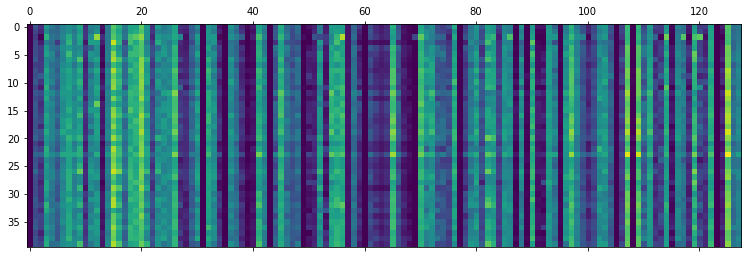

----------------------------------------------------

Current layer: block2_conv2
Indices of FM with highest average firing rate in response to each image: 
[103  85  85 103 100  85 103 125 103 125 103 100 125 125  85 103 103 125
 103 100 103 125 103  85 103 103 103 125  85 103 100 103 103  85 125 100
 103  85 103 103]
#neurons in the FM with highest average firing rate: 256
Average activity for all feature maps in block2_conv2


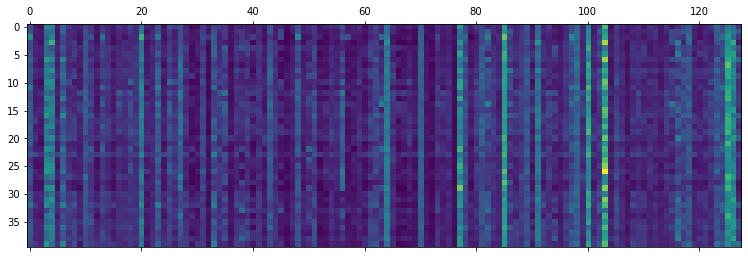

----------------------------------------------------

Current layer: block3_conv1
Indices of FM with highest average firing rate in response to each image: 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
#neurons in the FM with highest average firing rate: 64
Average activity for all feature maps in block3_conv1


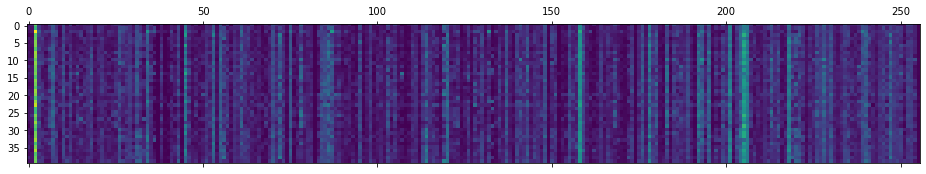

----------------------------------------------------

Current layer: block3_conv2
Indices of FM with highest average firing rate in response to each image: 
[65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65]
#neurons in the FM with highest average firing rate: 64
Average activity for all feature maps in block3_conv2


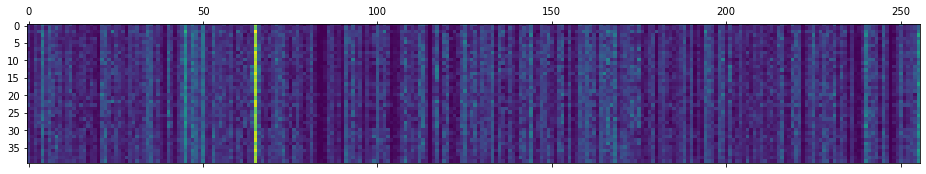

----------------------------------------------------

Current layer: block3_conv3
Indices of FM with highest average firing rate in response to each image: 
[54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54
 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54 54]
#neurons in the FM with highest average firing rate: 64
Average activity for all feature maps in block3_conv3


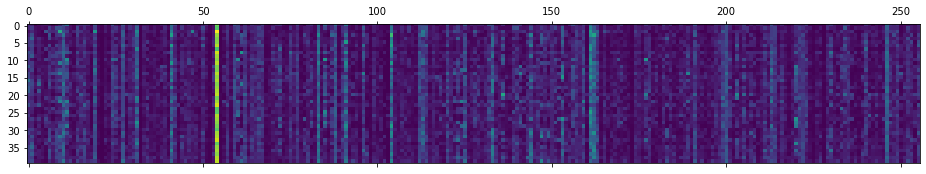

----------------------------------------------------

Current layer: block4_conv1
Indices of FM with highest average firing rate in response to each image: 
[461 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461
 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461 461
 461 461 461 461]
#neurons in the FM with highest average firing rate: 16
Average activity for all feature maps in block4_conv1


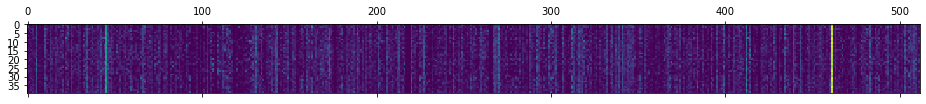

----------------------------------------------------

Current layer: block4_conv2
Indices of FM with highest average firing rate in response to each image: 
[ 24  24  24  24  24  24  24 142 143  24  24  24 143  24 470  24  24 436
  24  24  24  24 118  24 142  95 223  24  24  24  24  24  24  24  24 142
  24  24  24  24]
#neurons in the FM with highest average firing rate: 16
Average activity for all feature maps in block4_conv2


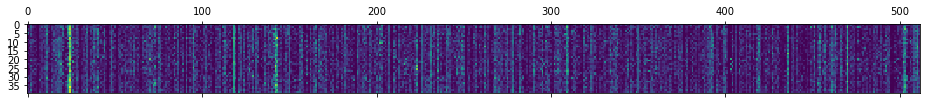

----------------------------------------------------

Current layer: block4_conv3
Indices of FM with highest average firing rate in response to each image: 
[296 363 486  30 435 486 296  92 118 273 460  30 121 378  30 454 213 173
  34 464 296  30 443 296 296 363 201 463 460  30 468 435 363 486 486 486
  30 486 282 486]
#neurons in the FM with highest average firing rate: 16
Average activity for all feature maps in block4_conv3


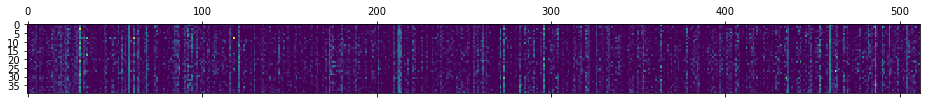

----------------------------------------------------

Current layer: block5_conv1
Indices of FM with highest average firing rate in response to each image: 
[410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410]
#neurons in the FM with highest average firing rate: 4
Average activity for all feature maps in block5_conv1


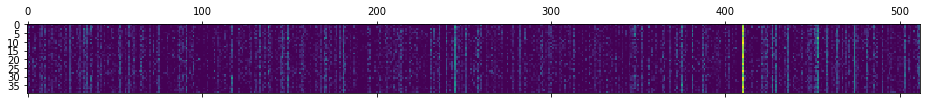

----------------------------------------------------

Current layer: block5_conv2
Indices of FM with highest average firing rate in response to each image: 
[ 89  55 394  55  55  89  55 391 400  55  55  55  89  55  55  89  55 391
  89  89  55  55  89  55  55  55  55  55 167  55 492  55  55 399  89 391
  55 399  55  89]
#neurons in the FM with highest average firing rate: 4
Average activity for all feature maps in block5_conv2


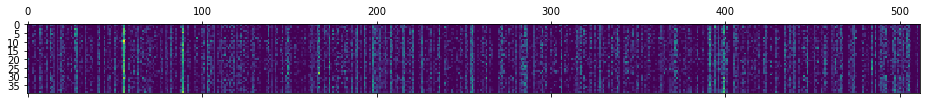

----------------------------------------------------

Current layer: block5_conv3
Indices of FM with highest average firing rate in response to each image: 
[155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155
 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155 155
 155 155 155 155]
#neurons in the FM with highest average firing rate: 4
Average activity for all feature maps in block5_conv3


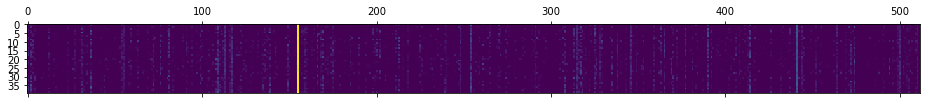

----------------------------------------------------



In [189]:
neuron_output_highest_no_shifts, fm_avg_all_layers_no_shifts, neuron_labels = show_stimuli(layer_indices = range(20), n_images_per_class = 10, image_classes = [3,1,0,5], shifts = False, plot_activity = True)

In [168]:
neuron_output_highest_no_shifts.shape

(40, 2812)

In [169]:
fm_avg_all_layers_no_shifts.shape

(40, 4224)

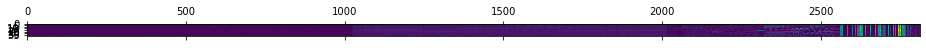

In [170]:
plt.matshow(neuron_output_highest_no_shifts )

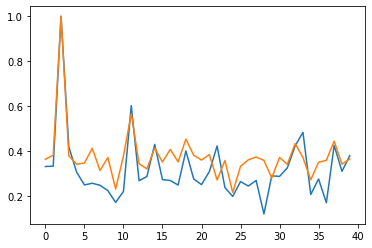

In [171]:
plt.plot(fm_avg_all_layers_no_shifts[:,5]/max(fm_avg_all_layers_no_shifts[:,5]))
plt.plot(fm_avg_all_layers_no_shifts[:,15]/max(fm_avg_all_layers_no_shifts[:,15]))
plt.show()

In [172]:
fm_5_no_shifts = fm_avg_all_layers_no_shifts[:,5]/max(fm_avg_all_layers_no_shifts[:,5])
fm_15_no_shifts = fm_avg_all_layers_no_shifts[:,15]/max(fm_avg_all_layers_no_shifts[:,15])

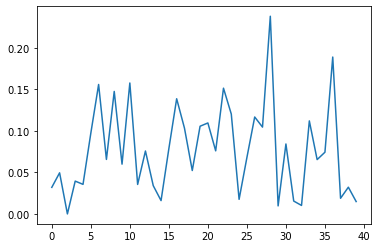

In [173]:
plt.plot(abs(fm_5_no_shifts - fm_15_no_shifts))
plt.show()

In [176]:
first_neuron = neuron_output_highest_no_shifts[0:10,1]
first_neuron = first_neuron.reshape((10,1))
first_neuron

array([[3.0840793],
       [2.9818833],
       [2.8158746],
       [2.603324 ],
       [2.1090958],
       [3.1401043],
       [3.270752 ],
       [2.6794887],
       [3.8676906],
       [3.2643716]], dtype=float32)

In [180]:
plt.matshow(fm_avg_all_layers_no_shifts, cmap = 'viridis')
plt.axis('off')

(-0.5, 4223.5, 39.5, -0.5)

### no shifts, generate embedding:

In [224]:
from sklearn.decomposition import PCA
pca = PCA(3)
neuron_output_highest_projected = pca.fit_transform(neuron_output_highest.T)
neuron_output_highest_projected.shape
# pca.fit(neuron_output_highest)
# vectors, lambdas = pca.components_, pca.explained_variance_

(2812, 3)

In [225]:
len(set(neuron_labels))

13

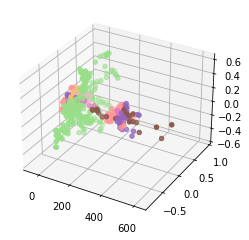

In [226]:
# import plotly
# ## long to load
# ax = plt.axes(projection='3d')
# ax.scatter(neuron_output_highest_projected[:,0],neuron_output_highest_projected[:,1], neuron_output_highest_projected[:,2], c= neuron_labels, cmap = 'tab20')

In [227]:
list(enumerate([56,43,'r',3]))

[(0, 56), (1, 43), (2, 'r'), (3, 3)]

In [228]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()
traces = []
colors_palette = px.colors.qualitative.Dark24
data = neuron_output_highest_projected

for i, label in enumerate(set(neuron_labels)):
    mask = (neuron_labels == label)
    print(label, sum(mask))
    traces.append(go.Scatter3d(
        x=data[mask,0],
        y=data[mask,1],
        z=data[mask,2],
        mode='markers',
        marker=dict(
            size=4,
            color=colors_palette[i],
            opacity=1,

            #showscale= True,
        )))

for trace in traces:
    fig.add_trace(trace)

# tight layout
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),showlegend=True,)
fig.show()

1 1024
2 1024
4 256
5 256
7 64
8 64
9 64
11 16
12 16
13 16
15 4
16 4
17 4


In [ ]:
## information from the above plot: neuron's filter + position
## choose per block 

In [ ]:
## shifts of images and average of all shifts
## sum over the shifts: same matrix size
## remove the position factor
## try different shift sizes
## 40 images

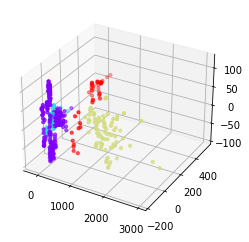

In [163]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42)
# kmeans.fit(neuron_output_highest_projected)
# centroids = kmeans.cluster_centers_
# clusters = kmeans.labels_

# ax = plt.axes(projection='3d')
# ax.scatter(neuron_output_highest_projected[:, 0], neuron_output_highest_projected[:,1], neuron_output_highest_projected[:,2],c=clusters, s=10, cmap='rainbow')

## Diffusion Maps:

### This problem can be seen as reducing the dimension of the point cloud of 400 points in the $\mathbb{R}^{2812}$

using pydiffmap: https://pydiffmap.readthedocs.io/en/master/index.html

In [32]:
import pydiffmap
from pydiffmap import diffusion_map as dm
from pydiffmap.visualization import embedding_plot, data_plot

In [33]:
neuron_output_highest = compute_neuron_output(layer_indices = range(21), n_images_per_class = 100, image_classes = [0,1,3,5]) # 'airplane','automobile','cat','dog'
neuron_output_highest.shape

(400, 32, 32, 3)
Current layer: block1_conv1
Indices of FM with highest average firing rate in response to each image: 
[31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31  5 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31  1 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 

Current layer: block3_conv2
Indices of FM with highest average firing rate in response to each image: 
[65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65 65
 65 65 65 65 65 65 65

Current layer: block5_conv1
Indices of FM with highest average firing rate in response to each image: 
[410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 474 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 172   1 410 410 410 410
 410 410 410 410 474 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 117 410 410 410 410 410 410 474
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410 410
 410 410 410 410 410 

(400, 2812)

In [238]:
image_class_labels = np.hstack(([0]*100,[1]*100,[3]*100,[5]*100))

In [273]:
def diffusion_maps(X):
    ## diffusion map with automatic epsilon detection:
    mydmap = dm.DiffusionMap.from_sklearn(n_evecs = 3, alpha = 12, epsilon = 'bgh', k=64)
    ## QUESTION: why division by zero when epsilon is not bgh automatic detection?
    
    # Fit to and transform the data
    X_dmap = mydmap.fit_transform(X)
    print(X_dmap[:,0].shape)
    
    embedding_plot(mydmap, dim=3, scatter_kwargs = {'c':image_class_labels, 'cmap': 'Spectral'})
    plt.show()

(400,)


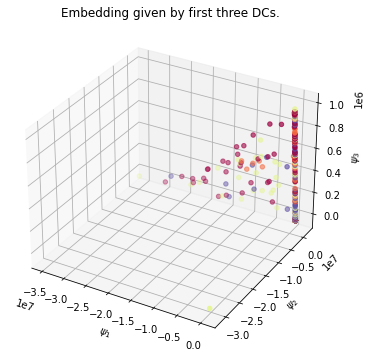

In [274]:
diffusion_maps(neuron_output_highest)

In [217]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [41]:
def my_diffmap(xs, sigma, t, m):
    W = np.exp(-euclidean_distances(xs, xs) ** 2 /(2 * (sigma ** 2)))
    
    ## d is a vector containing the row sums of W
    d = W.sum(axis=0)
    D_inv = np.diag(1/d)
    D_left = np.diag(d ** (-0.5))
    D_right = np.diag(d ** 0.5)
    
    M = D_inv @ W
    M_s = (D_right @ M) @ D_left
    
    ## M_s has nice real eigvecs and eigvals
    eigvals, eigvecs = eigh(M_s)
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    Phi = D_left @ eigvecs
    Lambda = eigvals ** t
    
    diffusion_map = Phi @ np.diag(Lambda)
    diffusion_map_trunc = diffusion_map[:,1:(m + 1)]
     
#     diffusion_map_trunc = eigvecs[:,1:(m + 1)] @ np.diag(eigvals[1:(m + 1)]) 
    
    return diffusion_map_trunc

In [305]:
diffusion_map_trunc = my_diffmap(neuron_output_highest, sigma = 3500, t = 1, m = 3)

In [306]:
diffusion_map_trunc.shape

(400, 3)

In [307]:
diffusion_map_trunc

array([[-1.06688759e-04,  2.65055918e-04, -5.76666979e-06],
       [-6.51677010e-04,  1.38841495e-03, -3.28772774e-05],
       [ 5.68934309e-03,  4.80744302e-03,  6.07329425e-04],
       ...,
       [-8.71436836e-03,  4.73516095e-03, -2.32736850e-02],
       [-6.47343100e-04,  1.40505343e-03, -3.70688653e-05],
       [-6.51650682e-04,  1.38841202e-03, -3.28724554e-05]])

In [308]:
image_class_labels = np.hstack(([0]*100,[1]*100,[3]*100,[5]*100))

In [309]:
image_class_labels.shape

(400,)

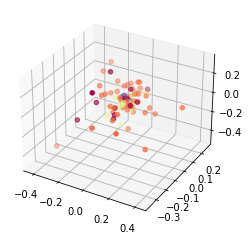

In [310]:
ax = plt.axes(projection ="3d")
ax.scatter3D(diffusion_map_trunc[:,0], diffusion_map_trunc[:,1], diffusion_map_trunc[:,2],c = image_class_labels,  cmap ='Spectral')

In [113]:
def compute_neuron_output_alt(layer_indices, n_images_per_class, image_classes):
    ## layer_indices, image_classes, n_images_classes, nFM_per_layers
    
#   previously: images = x_train[image_indices]
    n_classes = len(image_classes)
    n_layers = len(layer_indices)
    n_images = n_classes * n_images_per_class
    neuron_output_highest = []
    all_fm_avg = []
    
    for i in range(n_classes):
        idx = (y_train == image_classes[i]).reshape(x_train.shape[0])
        images = x_train[idx]
        ## images has shape (5000, 32, 32, 3), take the first n_images_per_class images from each selected class:
        images = images[0:n_images_per_class,:,:,:]
        if i == 0:
            images_selected_classes = images
        else:
            images_selected_classes = np.vstack((images_selected_classes, images))
    print(images_selected_classes.shape)
    
    for layer_index in layer_indices:
        layer = model.layers[layer_index] 
        
        # check for convolutional layer
        if 'conv' not in layer.name:
            continue
        
        ## note: always take the images as inputs
        output_layer = K.function(inputs=[model.layers[1].input], 
                              outputs=[layer.output])
        
        ## output is n feature maps
        neuron_output = output_layer(np.array(images_selected_classes))[0]
    
        ## number of neurons is nrow * ncol * n_feature_maps
        n_images, n_row, n_col, n_feature_maps = neuron_output.shape[:]
        neuron_output = neuron_output.reshape((n_images, n_row * n_col, n_feature_maps))
        
        ## transpose to organize by feature maps
        ## neuron_output_by_fm is (n_images, n_feature_maps, #neurons)
        neuron_output_by_fm = np.transpose(neuron_output, (0, 2, 1)) 
        
        ## compute avg neuron firing rate in each feature map
        ## fm_avg is (n_images, n_feature_maps)
        fm_avg = neuron_output_by_fm.sum(axis=2) / neuron_output_by_fm.shape[2]
        
        if layer_index == 1:
            fm_avg_all_layers = fm_avg
        else:
            fm_avg_all_layers = np.hstack((fm_avg_all_layers, fm_avg))
        
#         max_fm_ind = np.argmax(fm_avg,axis = 1)
        max_fm_ind = np.argpartition(fm_avg, -10)[-10:]
        
        print("Current layer: " + layer.name)
        print("Indices of FM with highest average firing rate in response to each image: " )
        print(max_fm_ind)
        print("#neurons in the FM with highest average firing rate: " + str(n_row * n_col))
        print("Average activity for all feature maps in " + layer.name)
        plt.matshow(fm_avg)
        plt.show()
        print('----------------------------------------------------\n')
        
        
        temp = neuron_output_by_fm[0,max_fm_ind[0],:].reshape(1, n_row * n_col)
        for i in range(1,n_images):
            temp = np.vstack((temp, neuron_output_by_fm[i,max_fm_ind[i],:].reshape(1, n_row * n_col)))
        if(layer_index == 1): 
            neuron_output_highest = temp
        else:
            neuron_output_highest = np.hstack((neuron_output_highest, temp))
        
    ## choose 10 feature maps with highest avg
    ## pca + tca 
    ## choose the images by classes
    ## activties to cars  
    return neuron_output_highest, fm_avg_all_layers

(400, 32, 32, 3)
Current layer: block1_conv1
Indices of FM with highest average firing rate in response to each image: 
[[52 63 62  3  4  5  6  7  8  9 10 11 61 60 14 15 16 17 18 19 20 21 59 23
  24 58 26 27 28 29 30 57 32 33 34 35 36 37 38 39 40 41 42 43 44 56 46 47
  48 55 54 53  0 51 45 50 13  2 49 22 12  1 25 31]
 [52 63 61  3  4  5  6  7  8  9 10 11 12 13 14 15 60 17 18 19 20 21 22 59
  24 58 26 27 28 29 30 57 32 56 34 35 36 55 38 39 40 41 42 43 44 45 46 54
  48 53 50 51  0 49 47 23 33 62 37  1 16  2 25 31]
 [24 27 53 52 50  5 48  7 46 43 61 11 12 40 14 39 36 17 32 19 29 28 55 42
  38 59  3  4 21  6 30  8 44 57  9 35 60 56 22 15 13 54 58 41 26 34 20 49
  23 63 51 45 47 18 62  0 37 33  1 25 16 10  2 31]
 [52 63 62  3  4 61  6  7  8 60 59 11 12 58 14 15 16 17 18 19 57 21 56 23
  24 55 26 27 28 29 30 54 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 53 50 51  0  2 10 13  5 20  9 49  1 22 25 31]
 [54 63 61  3  4  5  6  7  8  9 10 11 12 13 14 15 60 17 18 19 20 21 22 23
  24 59 26

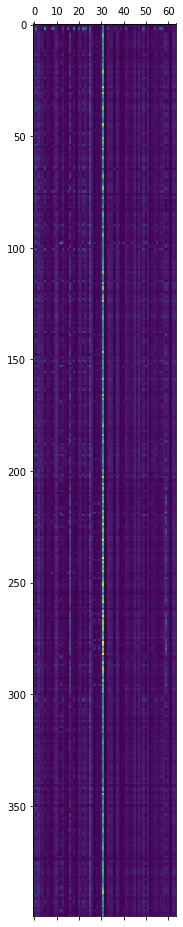

----------------------------------------------------



ValueError: cannot reshape array of size 65536 into shape (1,1024)

In [114]:
neuron_output_highest, fm_avg_all_layers = compute_neuron_output_alt(layer_indices =[1], n_images_per_class = 100, image_classes = [3,1,0,5]) # 'cat', 'airplane','automobile','dog'